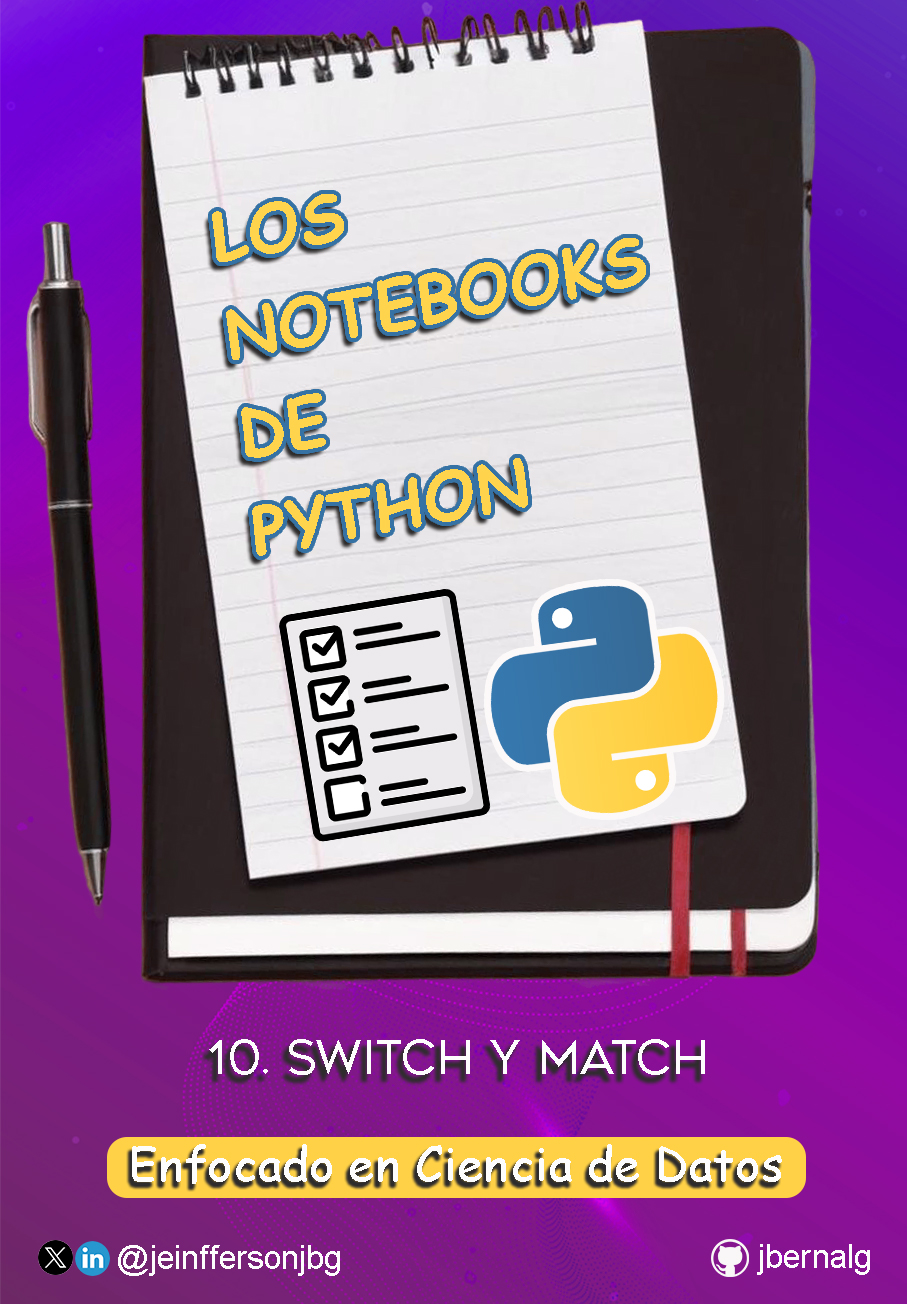

# __Switch en Python__

El switch es una herramienta que nos permite ejecutar diferentes secciones de código dependiendo de una condición. Su funcionalidad es similar a usar varios _if_, pero Python no cuenta con esta herramienta. Sin embargo, hay formas de simular su comportamiento.

## Introducción al Switch

Sabemos que el uso del _if_ junto con _else_ y _elif_ permite ejecutar un código determinado dependiendo de una condición.

In [2]:
# definimos una variable
cond = 3

# condicionales
if cond == 1:
    print('Se ecribe a')
elif cond == 2:
    print('Se escribe b')
elif cond == 3:
    print('Se escribe c')
else:
    print('Se escribe d')

Se escribe c


Este comportamiento podría fácilmente obtenerse con un _Switch_, pero como ya sabemos esta estructura no existe en Python. Además, al analizar como funciona por debajo, hay cierta ventaja en cuanto al rendimiento al utilizar _Switch_ en vez de _if_. Todas las condiciones van siendo evaluadas hasta que se cumple y se sale. En el siguiente ejemplo tenemos 10 condiciones y queremos acceder a séptima condición.

In [3]:
cond = 7

if cond == 1:
    print('1')
elif cond == 2:
    print('2')
elif cond == 3:
    print('3')
elif cond == 4:
    print('4')
elif cond == 5:
    print('5')
elif cond == 6:
    print('6')
elif cond == 7:
    print('7')
elif cond == 8:
    print('8')
elif cond == 9:
    print('9')
elif cond == 10:
    print('10')
else:
    print('x')

7


El tiempo de ejecución es distinto si la condición es 1 ó es 7. Si es 1 se evalúa el primer _if_ y al cumplir la condición, se ejecuta y sale. Si es 7, se evalúa cada condición hasta llegar a 7.

Sin embargo, en _Switch_ todos los elementos tienen el mismo tiempo de acceso debido a que implementa lookup tables. Si se trabaja con un gran número de condiciones, el uso del _switch_ sobre el _if_ podría notarse.

## Emulando Switch en Python

Una forma de emular un _Switch_ en Python es haciendo uso de un diccionario.

In [4]:
# funcion con varias condiciones

def opera(operador, a, b):
    if operador == 'suma':
        return a + b
    elif operador == 'resta':
        return a - b
    elif operador == 'multiplica':
        return a * b
    elif operador == 'divide':
        return a / b
    else: 
        return None

Vamos a convertir el código anterior en un diccionario que simule el _Switch_.

In [5]:
def opera2(operador, a, b):
    return {
        'suma': lambda: a + b,
        'resta': lambda: a - b,
        'multiplica': lambda: a * b,
        'divide': lambda: a / b
    }.get(operador, lambda:None)

Probamos la función _opera_ que usa sólo _if_.

In [6]:
opera('resta', 9, 4)

5

Vamos a probar la funcion _opera2_ recordando que debemos usar () para realizar la llamada a la función ya que lo que se devuelve es una función lambda.

In [8]:
opera2('multiplica', 2, 3)()

6

## Tiempo de ejecución de Switch vs if

Usar _switch_ en vez de _if_ puede ser más rápido. Podemos implementar _switch_ con diccionarios en Python como vimos anteriormente.

Vamos a resolver un problema con fines didácticos para mostrar la rapidez de ejecución en ambos casos. Vamos a convertir un número decimal a binario.

In [2]:
# funcion para convertir un decimal a un binario (con if)
def usa_if(decimal):
    if decimal == '0':
        return "000"
    elif decimal == '1':
        return "001"
    elif decimal == '2':
        return "010"
    elif decimal == '3':
        return "011"
    elif decimal == '4':
        return "100"
    elif decimal == '5':
        return "101"
    elif decimal == '6':
        return "110"
    elif decimal == '7':
        return "111"
    else:
        return "NA"

Ahora vamos a resolverlo con un diccionario

In [3]:
# diccionario con lo valores a convertir
tabla_switch = {
        '0': '000',
        '1': '001',
        '2': '010',
        '3': '011',
        '4': '100',
        '5': '101',
        '6': '110',
        '7': '111',
    }

In [4]:
# funcion para convertir un decimal a binario (con diccionario)
def usa_switch(decimal):
    return tabla_switch.get(decimal, "NA")

Ambas funciones realizan lo mismo, pero estan implementadas de manera distinta. Vamos a medir el tiempo de ejecución de ambas para saber cuál es más rápida.

In [5]:
# libreria para medir el tiempo
import time

# creamos un decorador para permitir el tiempo
def mide_tiempo(funcion):

    def funcion_medida(*args, **kwargs):
        inicio = time.time()
        c = funcion(*args, **kwargs)
        print(f'Entrada: {args[1]}. Tiempo: {time.time() - inicio}')
        return c
    
    return funcion_medida

Ahora, vamos a crear una función que llame miles de veces a otra. Esto es debido a que necesitamos realizar varias llamadas a la función para obtener un resultado fiable.

In [6]:
@mide_tiempo
def repite_funcion(funcion, entrada):
    return [funcion(entrada) for i in range(1000000)]

Ahora vamos a llamar a las funciones con diferentes parámetros.

In [9]:
for i in range(8):
    repite_funcion(usa_if, str(i))

print(' ')

for i in range(8):
    repite_funcion(usa_switch, str(i))

Entrada: 0. Tiempo: 0.14778375625610352
Entrada: 1. Tiempo: 0.12461566925048828
Entrada: 2. Tiempo: 0.14133477210998535
Entrada: 3. Tiempo: 0.17455482482910156
Entrada: 4. Tiempo: 0.2014470100402832
Entrada: 5. Tiempo: 0.22576189041137695
Entrada: 6. Tiempo: 0.2422175407409668
Entrada: 7. Tiempo: 0.2533118724822998
 
Entrada: 0. Tiempo: 0.13576793670654297
Entrada: 1. Tiempo: 0.14064502716064453
Entrada: 2. Tiempo: 0.12308812141418457
Entrada: 3. Tiempo: 0.13427400588989258
Entrada: 4. Tiempo: 0.14073848724365234
Entrada: 5. Tiempo: 0.13309073448181152
Entrada: 6. Tiempo: 0.12637758255004883
Entrada: 7. Tiempo: 0.14063191413879395


> Claramente podemos notar que al usar switch la ejecución es más rápida que usando if.

# __Match en Python__

Python ofrece algo similar a _Switch_ desde la versión 3.10. Se trata de _Match_ y es una estructura en la que cada _case_ define un camino posible. El _ es la opción por defecto que se ejecuta si la entrada no coincide con ningún caso. Veamos cómo funciona con un ejemplo.

In [10]:
# definimos una variable
hora = 8

match hora:
    case 8:
        print('Desayuno')
    case 14:
        print('Almuerzo')
    case 21:
        print('Cena')
    case _:
        print('No comer')

Desayuno


## Múltiples condiciones en Match

Podemos tener en los _case_ multiples condiciones, donde | es interpretado como un _or_. Veamos un ejemplo:

In [11]:
#definimos una variable
mes = 4

match mes:
    case 12 | 1 | 2: print('Invierno')
    case  3 | 4 | 5: print('Primavera')
    case  6 | 7 | 8: print('Verano')
    case _: print('Error') 

Primavera


## Match de tuplas

Veamos cómo realizar una _match_ con tuplas

In [12]:
coordenada = (0, 1)
match coordenada:
    case (0, 0):
        print("Coordenada en origen")
    case (x, 0):
        print(f"Coordenada en eje x: {x}")
    case (0, y):
        print(f"Coordenada en eje y: {y}")
    case (x, y):
        print(f"Coordenada en: {x}, {y}")
    case _:
        print("Error")

Coordenada en eje y: 1


# __Ejercicios__

### Ejercicio 1

Escribe un programa que tome como entrada un número del 1 al 7 y devuelva el nombre del día correspondiente.

In [1]:
num = int(input('Ingrese el numero del dia: '))

match num:
    case 1:
        print('Lunes')
    case 2:
        print('Martes')
    case 3:
        print('Miercoles')
    case 4:
        print('Jueves')
    case 5:
        print('Viernes')
    case 6:
        print('Sabado')
    case 7:
        print('Domingo')

Miercoles


### Ejercicio 2

Dado un número que representa la edad de una persona, utiliza match para clasificarla como niño, adolescente, adulto o anciano.

In [3]:
edad = int(input('Ingrese edad: '))

match edad:
    case e if e < 0:
        print('La edad no puede ser negativa!')
    case e if 0 <= e <= 12:
        print('Es un niño')
    case e if 13 <= e <= 17:
        print('Es un Adolescente')
    case e if 18 <= e <= 64:
        print('Es un adulto')
    case e if e >= 65:
        print('Es un anciano')
    case _:
        print('Error. Entrada no valida')

Es un adulto


### Ejercicio 3

Solicita al usuario una operación (suma, resta, multiplicación, división) y dos números, luego utiliza match para realizar la operación correspondiente.

In [5]:
# solicitamos operacion y numeros
print('OPERACIONES DISPONIBLES: \nsuma\nresta\nmultiplicacion\ndivision')

oper = input('Introduce la operacion a realizar: ').strip().lower()
num1 = float(input('Ingrese el primer numero: '))
num2 = float(input('Ingrese el segundo numero: '))
print(' ')

# Switch con match-case
match oper:
    case 'suma':
        result = num1 + num2
        print(f'El resultado de la suma es {result}')
    case 'resta':
        result = num1 - num2
        print(f'El resultado de la resta es {result}')
    case 'multiplicacion' | 'multiplicación':
        result = num1*num2
        print(f'El resultado de la multiplicacion es {result}')
    case 'division' | 'división':
        if num2 != 0:
            result = num1/num2
            print(f'El resultado de la division es {result}')
        else:
            print('Error. No se puede dividir entre cero')
    case _:
        print('Operacion no valida')

OPERACIONES DISPONIBLES: 
suma
resta
multiplicacion
division
 
El resultado de la resta es -5.0


### Ejercicio 4

Introduce un color como texto (por ejemplo, "rojo", "azul", "verde") e imprime un mensaje personalizado para cada color.

In [7]:
# definimos un diccionarios con los colores y sus mensajes
# este emulara el comportamiento de un switch

color_mensaje = {
    'rojo': 'Pasion y energia',
    'azul': 'Tranquilidad y confianza',
    'verde': 'Naturaleza y equilibrio',
    'amarillo': 'Alegria y creatividad'
}

# solicitamos el color al usuario
color = input('Introduce un color (rojo, azul, verde, amarillo): ').strip().lower()

# obtener el mensaje correspondiente  usando el diccionario
mensaje = color_mensaje.get(color, 'Color no reconocido. Intentelo nuevamente!')

print(mensaje)

Color no reconocido. Intentelo nuevamente!


### Ejercicio 5

Escribe un programa que lea un carácter alfabético y utilice match para determinar si es una vocal o una consonante.

In [1]:
# solicitar caracter alfabetico
char = input('Ingrese un caracter alfabetico: ').lower()

# diccionario de vocales
vocales = {
    'a': 'vocal',
    'e': 'vocal',
    'i': 'vocal',
    'o': 'vocal',
    'u': 'vocal'
}

# Verificar si el caracter es alfabetico
if char.isalpha() and len(char) == 1:
    result = vocales.get(char, 'consonante')
    print(f'El caracter {char} es una {result}')
else:
    print(f'Introduce un caracter alfabetico')

El caracter q es una consonante


### Ejercicio 6

Según el tipo de cliente (Estudiante, jubilado, miembro regular, no miembro), aplica un descuento diferente utilizando match

In [4]:
# solicitar tipo de cliente
print('CLIENTES: \nEstudiante\nJubilado\nMiembro\nNoMiembro\n')

cliente = input('Ingrese un tipo de cliente: ').strip().lower()
monto = float(input('Ingrese el monto total: '))

# switch con match-case
match cliente:
    case 'estudiante':
        print('20% de descuento por ser estudiante')
        print(f'Monto: {monto}')
        print('Descuento: 20%')
        monto -= monto*0.20
        print(f'Total con descuento: {monto}')
    case 'jubilado':
        print('30% de descuento por ser jubilado')
        print(f'Monto: {monto}')
        print('Descuento: 30%')
        monto -= monto*0.30
        print(f'Total con descuento: {monto}')
    case 'miembro':
        print('35% de descuento por ser miembro')
        print(f'Monto: {monto}')
        print('Descuento: 35%')
        monto -= monto*0.35
        print(f'Total con descuento: {monto}')
    case 'nomiembro':
        print('10% de descuento por ser nuevo cliente')
        print(f'Monto: {monto}')
        print('Descuento: 10%')
        monto -= monto*0.10
        print(f'Total con descuento: {monto}')
    case _:
        print('Tipo de cliente no valido')

CLIENTES: 
Estudiante
Jubilado
Miembro
NoMiembro

35% de descuento por ser miembro
Monto: 2500.0
Descuento: 35%
Total con descuento: 1625.0


### Ejercicio 7

Utiliza match para clasificar un número entero dado como positivo, negativo o cero

In [7]:
# solicitar numero
num = int(input('Ingrese un numero entero: '))

match num:
    case num if num > 0:
        print('Positivo')
    case num if num < 0:
        print('Negativo')
    case num if num == 0:
        print('Cero')

Cero


### Ejercicio 8

Introduce una emoción como texto (feliz, triste, enojado, asustado)  y utilice diccionarios que emulen un switch en python para devolver el emoji correspondiente.

In [4]:
# mostrar emociones
print('Emociones: \nfeliz\ntriste\nenojado\nasustado\n')

# diccionario con emociones
emojis = {
    'feliz': '😊',
    'triste': '😢',
    'enojado': '😠',
    'asustado': '😨'
}

# solicitar emocion al usuario
emocion = input('Introduce una emocion:').strip().lower()

# obtener el emojis correspondiente
emoji_resultado = emojis.get(emocion, 'Emocion no reconocida!')

# mostra emocion
print(f'Emocion: {emocion.capitalize()} - Emoji:{emoji_resultado}')

Emociones: 
feliz
triste
enojado
asustado

Emocion: Asustado - Emoji:😨


### Ejercicio 9

Escribe un programa que tome como entrada un valor (puede ser un entero, una cadena, una lista, etc.) y utilice match para identificar y clasificar el tipo de dato.

In [11]:
# solicitar valor a usuario
entrada = eval(input('Ingresa un valor (entero, float, cadena, etc...): '))

# Clasificar el tipo de dato
match entrada:
    case int():
        print('El valor es un numero entero')
    case float():
        print('El valor es un numero flotante')
    case str():
        print('El valor es un string')
    case list():
        print('El valor es una lista')
    case tuple():
        print('El valor es una tupla')
    case dict():
        print('El valor es un diccionario')
    case set():
        print('El valor es un conjunto set')
    case bool():
        print('El valor es un booleano')
    case None:
        print('El valor es None (nulo)')
    case _:
        print('El tipo de dato no es reconocido!')
        

El valor es una tupla


### Ejercicio 10

Crea un programa que tome diferentes entradas del usuario (como un correo electrónico, un número de teléfono o una URL) y utilice match para verificar y clasificar el formato de cada entrada.

In [12]:
# importamos libreria de expersiones regulares
import re

# bucle infinito
while True:
    # solicitar los datos
    user_input = input('Ingrese un dato (Correo, telefono, URL o Salir para terminar)')

    # terminar programa
    if user_input.lower() == 'salir':
        print('Programa Finalizado')
        break

    # clasificar las entradas
    match user_input:
        # correo
        case _ if re.match(r"^[\w\.-]+@[\w\.-]+\.\w+$", user_input):
            print('Es un correo electronico')

        # telefono
        case _ if re.match(r"^\+?\d{7,15}$", user_input):
            print('Es un numero de telefono')

        # URL
        case _ if re.match(r"^(http://|https://)?(www\.)?[\w\-]+\.\w+.*$", user_input):
            print('Es una URL valida')

        # ninguna de las anteriores
        case _:
            print('El dato ingresado no coincide con ningun formato')



Es un correo electronico
Programa Finalizado
